In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

/tmp/ipykernel_35111/326693203.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(landau, bin_centers, counts, p0=p0)


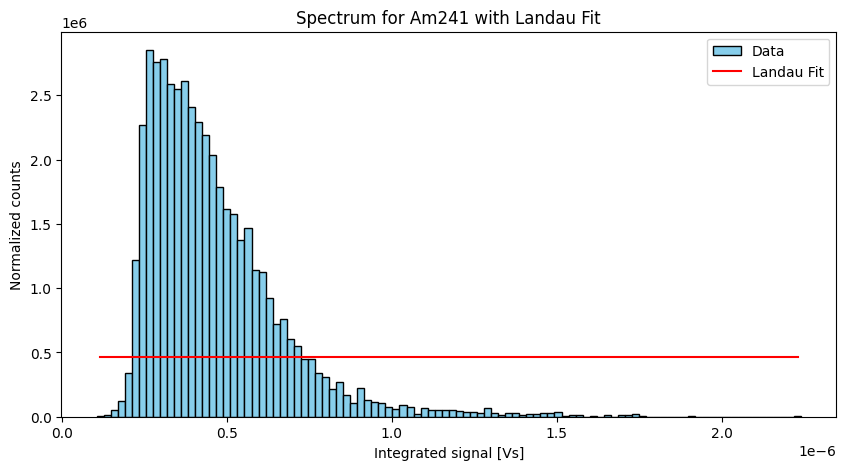

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Load data
df = pd.read_csv('1b_integrated_signal_AM.csv')
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Histogram
counts, bin_edges = np.histogram(data, bins=100, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

# Landau approximation (empirical formula)
def landau(x, mpv, eta, A):
    # mpv: most probable value
    # eta: width parameter (like sigma)
    # A: amplitude (scaling)
    xi = (x - mpv) / eta
    return A * np.exp(-0.5 * ((xi + np.exp(-xi)) + np.log(2*np.pi)) )

# Initial guess
p0 = [np.median(data), 0.01, 1]

# Fit
params, cov = curve_fit(landau, bin_centers, counts, p0=p0)

# Plot
fig, axs = plt.subplots(figsize=(10, 5))
axs.hist(data, bins=100, density=True, color='skyblue', edgecolor='black', label='Data')
axs.plot(bin_centers, landau(bin_centers, *params), 'r-', label='Landau Fit')

# Labels and title
axs.set_xlabel("Integrated signal [Vs]")
axs.set_ylabel("Normalized counts")
axs.set_title("Spectrum for Am241 with Landau Fit")
axs.legend()

plt.show()



In [1]:
import ROOT
import pandas as pd
import numpy as np

# Load CSV using pandas
df = pd.read_csv('1b_integrated_signal_AM.csv')
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Create ROOT histogram
hist = ROOT.TH1F("hist", "Spectrum for Am241;Integrated signal [Vs];Counts", 100, min(data), max(data))

# Fill histogram
for val in data:
    hist.Fill(val)

# Define Landau fit
landau_fit = ROOT.TF1("landau_fit", "landau", min(data), max(data))

# Fit histogram
hist.Fit("landau_fit")

# Draw histogram and fit
canvas = ROOT.TCanvas("canvas", "Landau Fit", 800, 600)
hist.SetFillColor(ROOT.kAzure + 7)
hist.Draw()
landau_fit.SetLineColor(ROOT.kRed)
landau_fit.Draw("SAME")

# Save plot if needed
canvas.SaveAs("landau_fit_am.png")


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      833.923
NDf                       =           73
Edm                       =  2.56377e-06
NCalls                    =          165
Constant                  =      3239.67   +/-   51.5509     
MPV                       =  3.22008e-07   +/-   1.39648e-09 
Sigma                     =  5.34911e-08   +/-   6.27769e-10  	 (limited)


Info in <TCanvas::Print>: png file landau_fit_am.png has been created


In [1]:
import ROOT
import pandas as pd
import numpy as np
# Load CSV using pandas
df = pd.read_csv('1b_integrated_signal_NA.csv')
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Create ROOT histogram
hist = ROOT.TH1F("hist", "Spectrum for NA22;Integrated signal [Vs];Counts", 100, min(data), max(data))

# Fill histogram
for val in data:
    hist.Fill(val)

# Define Landau fit
landau_fit = ROOT.TF1("landau_fit", "landau", min(data), max(data))

# Fit histogram
hist.Fit("landau_fit")

# Draw histogram and fit
canvas = ROOT.TCanvas("canvas", "Landau Fit", 800, 600)
hist.SetFillColor(ROOT.kAzure + 7)
hist.Draw()
landau_fit.SetLineColor(ROOT.kRed)
landau_fit.Draw("SAME")

# Save plot if needed
canvas.SaveAs("landau_fitNA.png")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      298.646
NDf                       =           92
Edm                       =   1.6677e-08
NCalls                    =          156
Constant                  =      3625.95   +/-   61.1104     
MPV                       =  1.99064e-07   +/-   1.24963e-09 
Sigma                     =  5.61049e-08   +/-   7.83854e-10  	 (limited)


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: png file landau_fitNA.png has been created


In [3]:
import ROOT
import pandas as pd
import numpy as np
# Load CSV using pandas
df = pd.read_csv('1b_integrated_signal_SR.csv')
data = df['integrated_signal_Vs'].values
data = data[np.isfinite(data)]

# Create ROOT histogram
hist = ROOT.TH1F("hist", "Spectrum for Sr90;Integrated signal [Vs];Counts", 100, min(data), max(data))

# Fill histogram
for val in data:
    hist.Fill(val)

# Define Landau fit
landau_fit = ROOT.TF1("landau_fit", "landau", min(data), max(data))

# Fit histogram
hist.Fit("landau_fit")

# Draw histogram and fit
canvas = ROOT.TCanvas("canvas", "Landau Fit", 800, 600)
hist.SetFillColor(ROOT.kAzure + 7)
hist.Draw()
landau_fit.SetLineColor(ROOT.kRed)
landau_fit.Draw("SAME")

# Save plot if needed
canvas.SaveAs("landau_fit_SR.png")

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: png file landau_fit_SR.png has been created


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      2028.35
NDf                       =           12
Edm                       =  8.88418e-08
NCalls                    =          187
Constant                  =      23144.6   +/-   489.918     
MPV                       =  7.64072e-07   +/-   1.70382e-09 
Sigma                     =  6.94452e-08   +/-   1.08945e-09  	 (limited)
